In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
path = "/content/heart.csv"
df = pd.read_csv(path)
df['target'] = df['target'].replace(0, -1)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,-1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,-1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,-1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,-1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,-1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,-1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [81]:

print(df.describe())
print(df.isnull().sum())
df.dtypes

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<Axes: xlabel='age'>

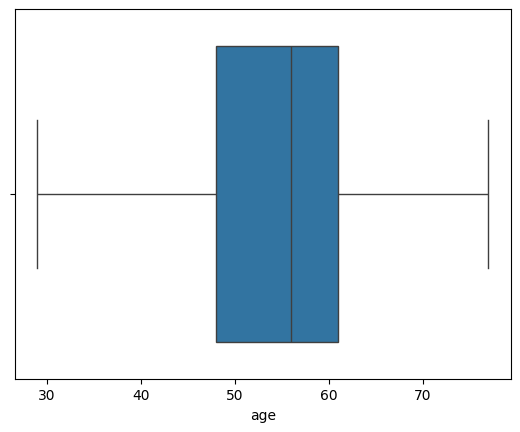

In [82]:
sns.boxplot(x=df['age'])


<Axes: xlabel='chol'>

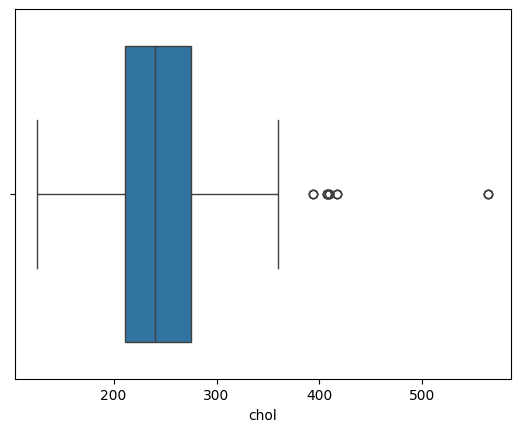

In [83]:
sns.boxplot(x=df['chol'])

<Axes: xlabel='trestbps'>

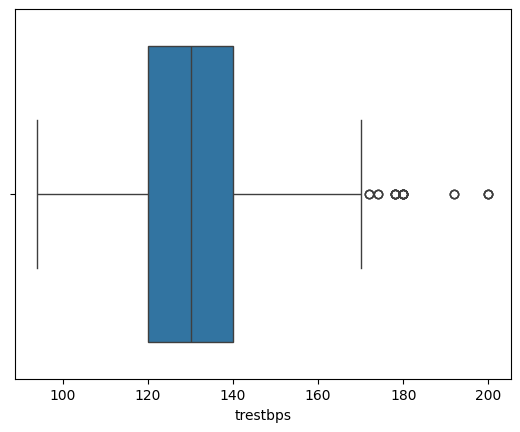

In [84]:

sns.boxplot(x=df['trestbps'])


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


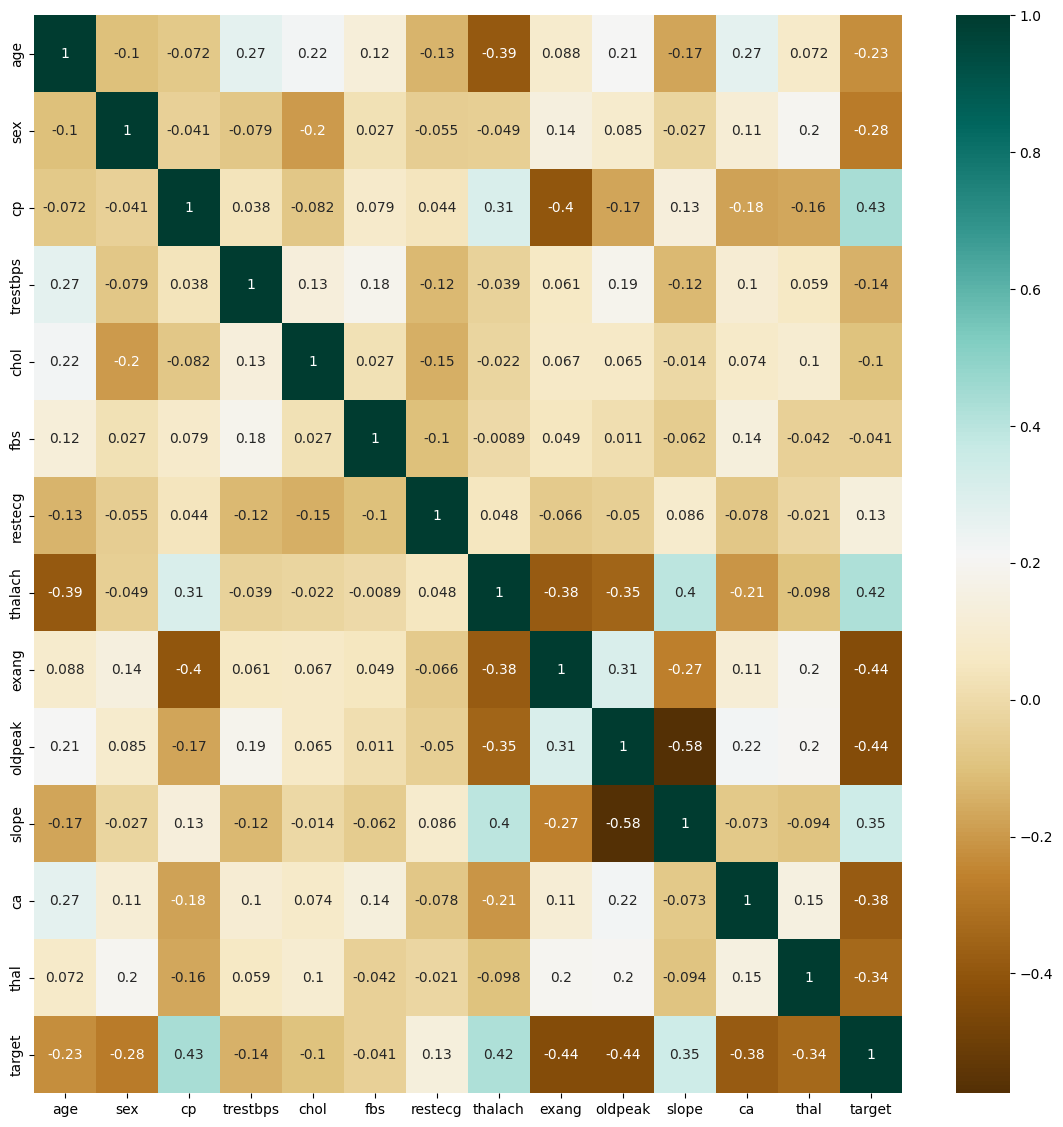

In [85]:
plt.figure(figsize=(14,14))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

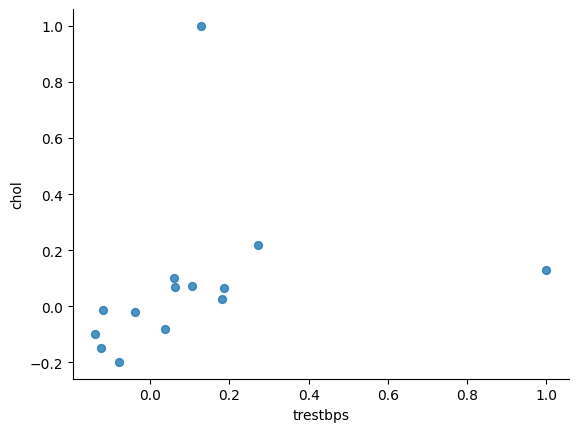

In [86]:
# @title trestbps vs chol

from matplotlib import pyplot as plt
c.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

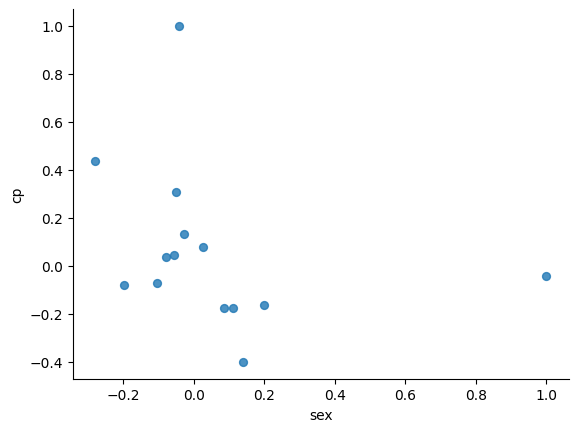

In [87]:
# @title sex vs cp

from matplotlib import pyplot as plt
c.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [88]:
feature_list = [feature for feature in df.columns]
print(feature_list)
print("There are",len(feature_list),"features found in the data")

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
There are 14 features found in the data


In [89]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [90]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''

    w = np.zeros(X.shape[1])
    lr = 0.1
    epochs = 1000

    for t in range(epochs):
        for i, x in enumerate(X):

            if (Y[i] * np.dot(x, w) <= 0):
                w = w + Y[i] * x * lr
                #print(x)


    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [91]:
def perceptron_sgd_plot(X, Y):
    '''
    Train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    w = np.zeros(X.shape[1])
    lr = 0.1
    epochs = 1000

    L = []

    for t in range(epochs):
        loss = 0
        for i, x in enumerate(X):

            if  np.sign(np.dot(x, w)) != Y[i]:

                w = w + Y[i] * x * lr;
                loss = loss + 1

        L.append(loss)

    plt.plot(L)
    plt.title('Total Error per Epoch')
    plt.show()

    return w


In [92]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
#['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#8,9,10,11,12

In [93]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

bias_column = np.ones((X.shape[0], 1)) * -1

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [94]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with a 0.2 ratio

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


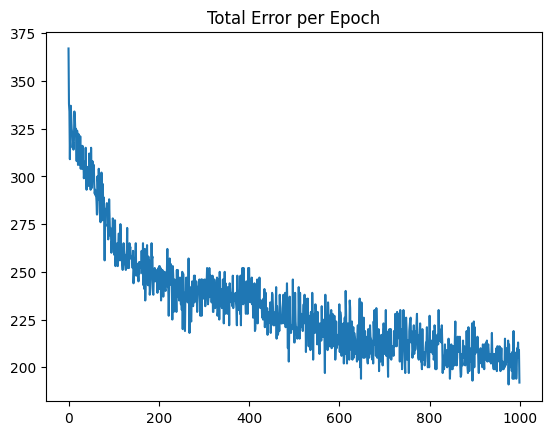

In [95]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [96]:
def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    all = len(y_true)

    accuracy = correct / all
    return accuracy

Get the accuracy of your model using the function you implemented.

In [97]:
predictions = np.sign(np.dot(X_val, perceptron_sgd(X_train, y_train)))

accuracy = accuracy_score(y_val, predictions)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.8048780487804879


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [98]:
from sklearn import metrics
def confusion_matrix(actual, predicted, labels):
    matrix = metrics.confusion_matrix(actual, predicted)
    return matrix


Implement the following function to plot the confusion matrix obtained from the previous part.

In [99]:

import seaborn as sns

def plot_confusion_matrix(matrix, labels):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    cm_display.plot()
    plt.show()


Now plot the confusion matrix for your model:

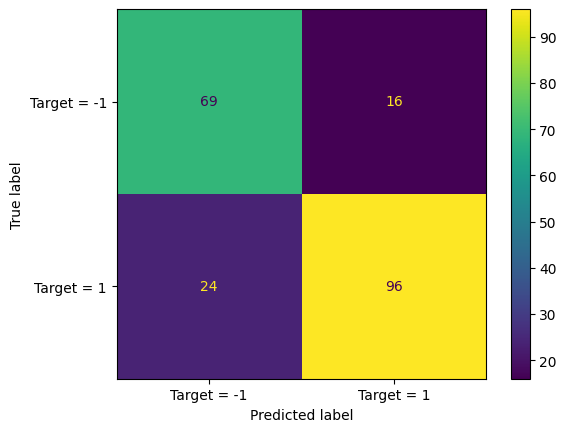

In [100]:
labels = ["Target = -1", "Target = 1"]
matrix = confusion_matrix(y_val, predictions, labels)

plot_confusion_matrix(matrix, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [101]:
def recall_score(cm):
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    return recall
print(recall_score(matrix))

0.8


In [102]:
def precision_score(cm):
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    return precision

print(precision_score(matrix))

0.8571428571428571


In [103]:
def f1_score(cm):
    recall = recall_score(cm)
    precision = precision_score(cm)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1
print(f1_score(matrix))

0.8275862068965518


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [104]:
class myGNB:
    def fit(self, X, y):
        self.C = np.unique(y)
        self.cprob = np.zeros(len(self.C))
        self.means = np.zeros((len(self.C), X.shape[1]))
        self.std = np.zeros((len(self.C), X.shape[1]))

        for i, c in enumerate(self.C):
            X_c = X[y == c]
            self.cprob[i] = len(X_c) / len(X)
            self.means[i] = np.mean(X_c, axis = 0)
            self.std[i] = np.std(X_c, axis = 0)

    def predict(self, X):

        p = []
        for x in X:
            ans = []
            for i, c in enumerate(self.C):
                if (self.std[i]).any() == 0:

                    cur = 1e-12
                else:
                    res = (x - self.means[i]) / self.std[i]
                    cur = np.prod(np.exp( -0.5 * res ** 2) / (np.sqrt(2 * np.pi) * self.std[i]))

                ans.append(cur * self.cprob[i])
            p.append(self.C[np.argmax(ans)])
        return np.array(p)


In [146]:

from sklearn.preprocessing import KBinsDiscretizer

class MixedDataNB:

    def __init__(self, x):
        self.a = x
        self.gaussian_nb = myGNB()
        self.kbins_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

    def fit(self, X, y):
        '''
        Train model using train data

        :param X: data samples as a numpy array
        :param Y: data labels as a numpy array
        '''

        continuous = [8, 9, 10, 11, 12]
        categorical = [0, 1, 2, 3, 4, 5, 6, 7]
        if (self.a == 10) :
          continuous = [8, 9, 11, 12]
        if (self.a == 12) :
          continuous = [8, 9, 10, 11]



        self.gaussian_nb.fit(X[:, continuous], y)
        X_discretized = self.kbins_discretizer.fit_transform(X[:, categorical])
        X_combined = np.concatenate((X_discretized, X[:, continuous]), axis=1)
        self.gaussian_nb.fit(X_combined, y)

    def predict(self, X):
        '''
        Predict test data labels

        :param X: data samples as a numpy array
        :return: labels vector as a numpy array
        '''

        continuous = [8, 9, 10, 11, 12]
        categorical = [0, 1, 2, 3, 4, 5, 6, 7]

        if (self.a == 10) :
          continuous = [8, 9, 11, 12]
        if (self.a == 12) :
          continuous = [8, 9, 10, 11]

        predictions = []


        X_discretized = self.kbins_discretizer.transform(X[:, categorical])
        X_combined = np.concatenate((X_discretized, X[:, continuous]), axis=1)

        predictions = self.gaussian_nb.predict(X_combined)

        return predictions


## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

### Model training

In [148]:
a = 0
model = MixedDataNB(a)
model.fit(X_train, y_train)


### Make predictions

In [149]:
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [150]:
print(accuracy_score(y_val, predictions))

0.9619047619047619


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

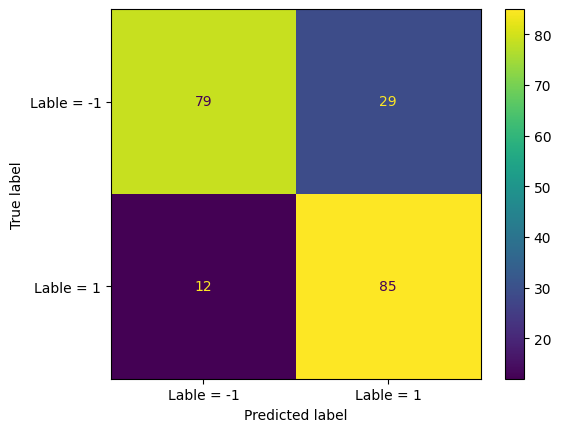

In [110]:
labels = ["Lable = -1", "Lable = 1"]

cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [141]:
print(recall_score(cm))

0.8762886597938144


In [142]:
print(precision_score(cm))

0.7456140350877193


In [143]:
print(f1_score(cm))

0.8056872037914692


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


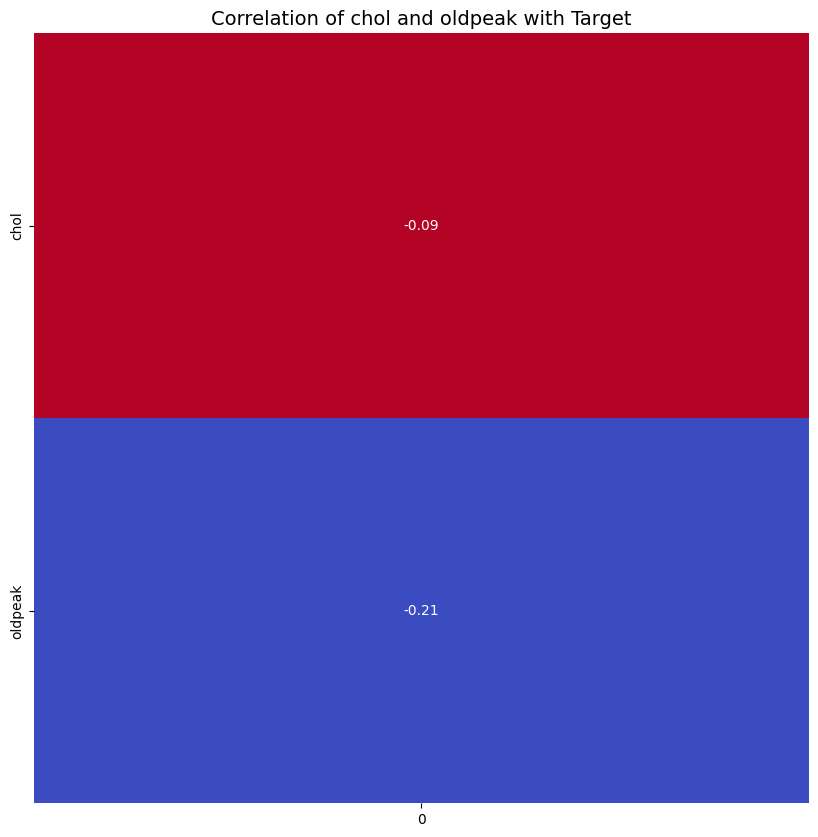

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
features = df[['chol', 'oldpeak']]
targ = df['target']


correlation_matrix = features.corrwith(targ)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation of chol and oldpeak with Target', fontsize = 14)
plt.show()



Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [153]:

X_new = np.delete(X_train, 12, axis=1)
X_v = np.delete(X_val, 12, axis=1)

m = MixedDataNB(12)
m.fit(X_train, y_train)
pred = m.predict(X_val)


print("Accuracy without chol feature:", accuracy_score(y_val, pred))



Accuracy without chol feature: 0.9714285714285714


Remove oldpeak and test model

In [154]:
X_new = np.delete(X_train, 10, axis=1)
X_v = np.delete(X_val, 10, axis=1)

m2 = MixedDataNB(10)
m2.fit(X_train, y_train)
pred = m2.predict(X_val)

print("Accuracy without oldpeak feature:", accuracy_score(y_val, pred))


Accuracy without oldpeak feature: 0.9333333333333333


Comparison


<div dir="rtl">
همانطور که هیت مپ نشان ‌می‌دهد،
oldpeak
همبستگی زیادی با جواب دارد و حذف آن دقت مدل را حدود 3 درصد کاهش داده است در حالی که
thol
همبستگی کمی با جواب داشت و همانطور که انتظار میرفت حذف آن دقت مدل را تغییر زیادی نداد.

</div>



# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

<div dir="rtl">
در اینجا چون تشخیص اشتباه برای فردی که واقعا بیماری قلبی دارد، نسبت به تشخیص اشتباه کسی که بیماری قلبی ندارد هزینه بیشتری دارد، پس مقدار recall اهمیت پیدا میکند که در
Naive Bayes
بیشتر است. هممچنین
دقت مدل نیز در روش بیزی بالاتر است.
اگر داده‌ها به صورت خطی جدایی پذیر باشند و تعدادشان هم نسبتا زیاد باشد، شبکه عصبی بهتر کار میکند که در اینجا این شرایط برقرار نیست.

</div>


# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [117]:
df = pd.read_csv("1.csv")

### Find the distribution


Find the number of samples from each target label.

In [118]:
cnt = df['target'].value_counts()
print(cnt)

0    499
1    226
Name: target, dtype: int64


### Split data

In [119]:

X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


### Train model and make predictions

In [120]:
model2 = MixedDataNB(0)
model2.fit(X_train, y_train)

predictions = model2.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7931034482758621


### Plot confusion matrix

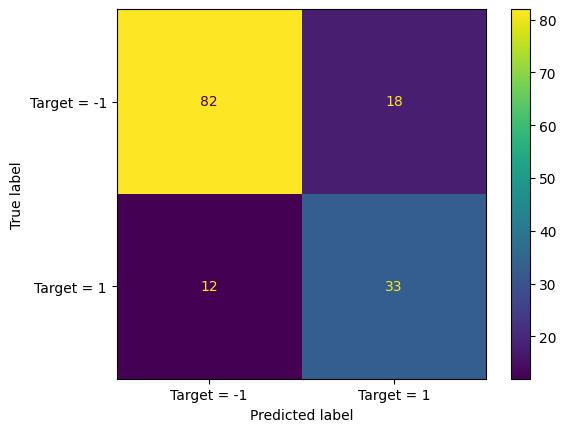

In [121]:
labels = ["Target = -1", "Target = 1"]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### Calculate metrics

In [122]:
print(recall_score(matrix))
print(precision_score(matrix))
print(f1_score(matrix))

0.7333333333333333
0.6470588235294118
0.6875


## Second dataset

### Load data

In [123]:
df = pd.read_csv("2.csv")

### Find the distribution


Find the number of samples from each target label.

In [124]:
cnt = df['target'].value_counts()
print(cnt)

0    499
1    126
Name: target, dtype: int64


### Split data

In [125]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


### Train model and make predictions

In [126]:
model2 = MixedDataNB(0)
model2.fit(X_train, y_train)

predictions = model2.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.848


### Plot confusion matrix

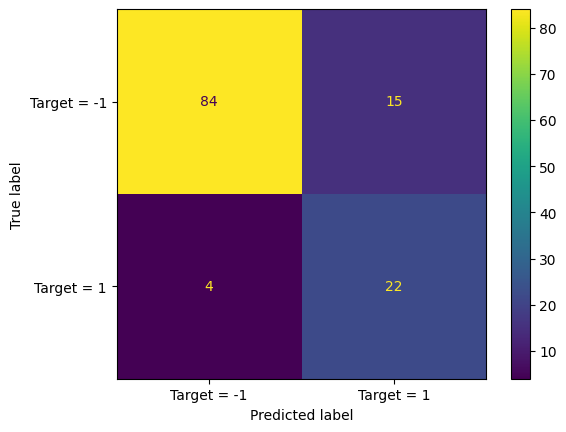

In [127]:
labels = ["Target = -1", "Target = 1"]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### Calculate metrics

In [128]:
print(recall_score(matrix))
print(precision_score(matrix))
print(f1_score(matrix))

0.8461538461538461
0.5945945945945946
0.6984126984126985


## Third dataset

### Load data

In [129]:
df = pd.read_csv("3.csv")

### Find the distribution


Find the number of samples from each target label.

In [130]:
cnt = df['target'].value_counts()
print(cnt)

0    499
1     26
Name: target, dtype: int64


### Split data

In [131]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


### Train model and make predictions

In [132]:
model2 = MixedDataNB(0)
model2.fit(X_train, y_train)

predictions = model2.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9619047619047619


### Plot confusion matrix

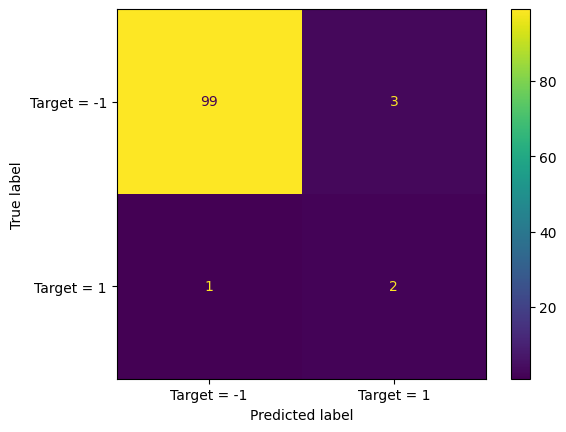

In [156]:
labels = ["Target = -1", "Target = 1"]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### Calculate metrics

In [159]:
print(recall_score(matrix))
print(precision_score(matrix))
print(f1_score(matrix))

0.6666666666666666
0.4
0.5


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

<div dir="rtl">


معیار
F1
معیار بهتری است.

مثلا ممکن است تقریبا همه داده‌ها از یک دسته باشند در اینصورت اگر مدل همه مقادیر را متناسب آن بدهد دقت بالایی دارد ولی مدل خوبی نیست.
در حالی که معیار
F1
از presition
و
recall
استفاده میکند و در این مدل داده ها میتواند بهتر مدل را ارزیابی کند.

</div>
